In [2]:
# Part 1: Bivariate Normal Distribution


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import urllib.request

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Introduction

The **Bivariate Normal Distribution** (BVN) is a probability distribution for two correlated random variables.

The probability density function (PDF) is:

$$f(x,y) = \frac{1}{2\pi\sigma_x\sigma_y\sqrt{1-\rho^2}} \exp\left(-\frac{1}{2(1-\rho^2)}\left[\frac{(x-\mu_x)^2}{\sigma_x^2} - \frac{2\rho(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y} + \frac{(y-\mu_y)^2}{\sigma_y^2}\right]\right)$$

Where:
- $\mu_x, \mu_y$ = means of x and y
- $\sigma_x, \sigma_y$ = standard deviations of x and y  
- $\rho$ = correlation coefficient between x and y

## 2. Load Dataset from Online Source

We use the **Iris Dataset** from the UCI Machine Learning Repository.

**Dataset Source:** https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

**Variables used for Bivariate Normal Distribution:**
- **X**: Sepal Length (cm)
- **Y**: Petal Length (cm)

These two measurements from flowers show natural correlation, making them ideal for demonstrating the bivariate normal distribution.

In [ ]:
# Download and load the Iris dataset from UCI ML Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

print("Downloading Iris dataset from UCI ML Repository...")
print(f"URL: {url}\n")


response = urllib.request.urlopen(url)
data_raw = response.read().decode('utf-8')


lines = data_raw.strip().split('\n')
data_list = []

for line in lines:
    if line:  
        parts = line.split(',')
        if len(parts) >= 4:  
            try:
                
                sepal_length = float(parts[0])
                petal_length = float(parts[2])
                data_list.append([sepal_length, petal_length])
            except ValueError:
                continue


data = np.array(data_list)
x_data = data[:, 0]  
y_data = data[:, 1]  

print("=" * 60)
print("IRIS DATASET LOADED SUCCESSFULLY")
print("=" * 60)
print(f"\nTotal data points: {len(x_data)}")
print(f"\nVariable X: Sepal Length (cm)")
print(f"  Range: [{x_data.min():.2f}, {x_data.max():.2f}]")
print(f"\nVariable Y: Petal Length (cm)")
print(f"  Range: [{y_data.min():.2f}, {y_data.max():.2f}]")
print("\n" + "=" * 60)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

IRIS DATASET LOADED SUCCESSFULLY

Total data points: 150

Variable X: Sepal Length (cm)
  Range: [4.30, 7.90]

Variable Y: Petal Length (cm)
  Range: [1.00, 6.90]



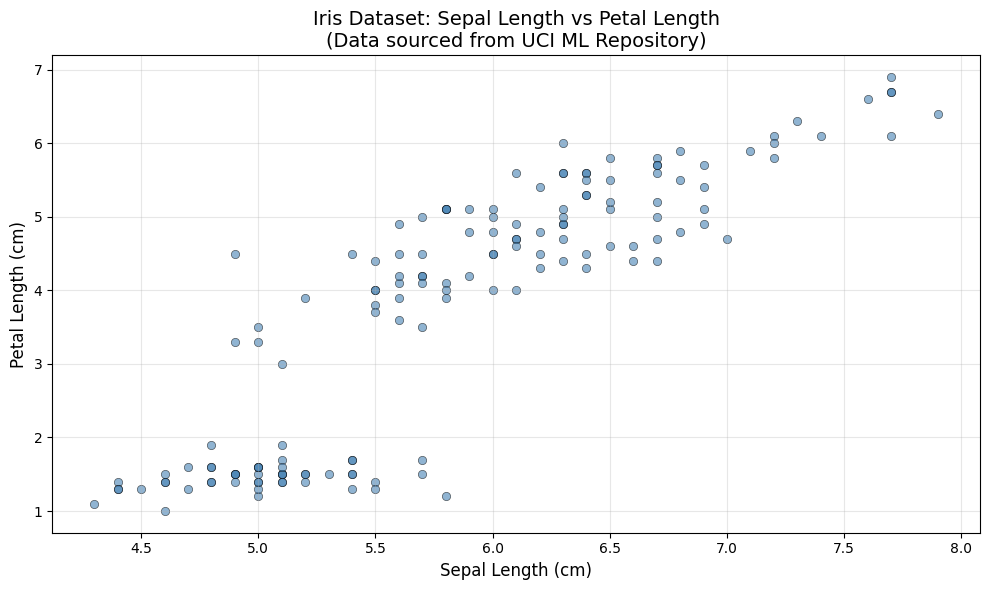


Dataset Source: UCI Machine Learning Repository
URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
# Visualize the raw data from Iris dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.6, edgecolors='black', linewidth=0.5, c='steelblue')
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.title('Iris Dataset: Sepal Length vs Petal Length\n(Data sourced from UCI ML Repository)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDataset Source: UCI Machine Learning Repository")
print(f"URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

## 3. Compute Distribution Parameters from Data

We compute the mean vector $\boldsymbol{\mu}$, standard deviations $\sigma_x, \sigma_y$, and correlation coefficient $\rho$ **from scratch** (no statistical libraries).

In [ ]:
def compute_mean(data):
    n = len(data)
    total = 0
    for value in data:
        total += value
    return total / n


def compute_variance(data, mean):
    n = len(data)
    sum_squared_diff = 0
    for value in data:
        sum_squared_diff += (value - mean) ** 2
    return sum_squared_diff / (n - 1)


def compute_std(data, mean):
    variance = compute_variance(data, mean)
    return np.sqrt(variance)


def compute_covariance(x, y, mean_x, mean_y):
    n = len(x)
    sum_product = 0
    for i in range(n):
        sum_product += (x[i] - mean_x) * (y[i] - mean_y)
    return sum_product / (n - 1)


def compute_correlation(x, y, mean_x, mean_y, std_x, std_y):
    covariance = compute_covariance(x, y, mean_x, mean_y)
    return covariance / (std_x * std_y)


print("Statistical functions defined successfully!")

Statistical functions defined successfully!


In [6]:
# Compute parameters from the Iris dataset
mu_x = compute_mean(x_data)
mu_y = compute_mean(y_data)

sigma_x = compute_std(x_data, mu_x)
sigma_y = compute_std(y_data, mu_y)

rho = compute_correlation(x_data, y_data, mu_x, mu_y, sigma_x, sigma_y)

print("=" * 60)
print("ESTIMATED PARAMETERS FROM IRIS DATASET")
print("=" * 60)
print(f"\nMean vector (μ):")
print(f"  μ_x (Sepal Length) = {mu_x:.4f} cm")
print(f"  μ_y (Petal Length) = {mu_y:.4f} cm")
print(f"\nStandard deviations (σ):")
print(f"  σ_x = {sigma_x:.4f} cm")
print(f"  σ_y = {sigma_y:.4f} cm")
print(f"\nCorrelation coefficient (ρ):")
print(f"  ρ = {rho:.4f}")
print(f"  Interpretation: Strong positive correlation between Sepal and Petal Length")
print("\n" + "=" * 60)

ESTIMATED PARAMETERS FROM IRIS DATASET

Mean vector (μ):
  μ_x (Sepal Length) = 5.8433 cm
  μ_y (Petal Length) = 3.7587 cm

Standard deviations (σ):
  σ_x = 0.8281 cm
  σ_y = 1.7644 cm

Correlation coefficient (ρ):
  ρ = 0.8718
  Interpretation: Strong positive correlation between Sepal and Petal Length



## 4. Implement Bivariate Normal PDF from Scratch

We implement the BVN PDF formula **without using any statistical libraries** like `scipy.stats`.

In [ ]:
def bivariate_normal_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    """
     Bivariate Normal Distribution PDF from scratch.
    
    The formula :
    f(x,y) = (1 / (2π σ_x σ_y √(1-ρ²))) * 
             exp(-1/(2(1-ρ²)) * [((x-μ_x)/σ_x)² - 2ρ((x-μ_x)/σ_x)((y-μ_y)/σ_y) + ((y-μ_y)/σ_y)²])
    
    Parameters:
    -----------
    x, y : float or array
        Point(s) at which to evaluate the PDF
    mu_x, mu_y : float
        Means of x and y
    sigma_x, sigma_y : float
        Standard deviations of x and y
    rho : float
        Correlation coefficient (-1 < rho < 1)
        
    Returns:
    --------
    float or array : PDF value at (x, y)
    """
    # Validate correlation coefficient
    if abs(rho) >= 1:
        raise ValueError("Correlation coefficient must satisfy -1 < rho < 1")
    
    # Standardize the variables
    z_x = (x - mu_x) / sigma_x
    z_y = (y - mu_y) / sigma_y
    
    #  the quadratic form in the exponent
    # Q = [z_x² - 2ρ*z_x*z_y + z_y²] / (1 - ρ²)
    one_minus_rho_sq = 1 - rho**2
    
    quadratic_form = (z_x**2 - 2*rho*z_x*z_y + z_y**2) / one_minus_rho_sq
    
    #  the normalization constant
    # C = 1 / (2π σ_x σ_y √(1-ρ²))
    normalization = 1 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(one_minus_rho_sq))
    
    # Compute the PDF
    pdf = normalization * np.exp(-0.5 * quadratic_form)
    
    return pdf


print("Bivariate Normal PDF function defined successfully!")
print("\nFormula implemented:")
print("f(x,y) = [1/(2π σ_x σ_y √(1-ρ²))] × exp{-1/[2(1-ρ²)] × [z_x² - 2ρ z_x z_y + z_y²]}")
print("where z_x = (x-μ_x)/σ_x and z_y = (y-μ_y)/σ_y")

Bivariate Normal PDF function defined successfully!

Formula implemented:
f(x,y) = [1/(2π σ_x σ_y √(1-ρ²))] × exp{-1/[2(1-ρ²)] × [z_x² - 2ρ z_x z_y + z_y²]}
where z_x = (x-μ_x)/σ_x and z_y = (y-μ_y)/σ_y


## 5. Compute PDF Values for Each Data Point

In [8]:

pdf_values = bivariate_normal_pdf(x_data, y_data, mu_x, mu_y, sigma_x, sigma_y, rho)

print("PDF values computed for all data points!")
print(f"\nNumber of data points: {len(pdf_values)}")
print(f"Min PDF value: {pdf_values.min():.6e}")
print(f"Max PDF value: {pdf_values.max():.6e}")
print(f"Mean PDF value: {pdf_values.mean():.6e}")


print("\nFirst 10 data points and their PDF values:")
print("-" * 50)
print(f"{'X':>10} {'Y':>10} {'PDF Value':>15}")
print("-" * 50)
for i in range(10):
    print(f"{x_data[i]:>10.4f} {y_data[i]:>10.4f} {pdf_values[i]:>15.6e}")

PDF values computed for all data points!

Number of data points: 150
Min PDF value: 1.813070e-03
Max PDF value: 2.190202e-01
Mean PDF value: 1.017722e-01

First 10 data points and their PDF values:
--------------------------------------------------
         X          Y       PDF Value
--------------------------------------------------
    5.1000     1.4000    7.836863e-02
    4.9000     1.4000    9.085358e-02
    4.7000     1.3000    7.951387e-02
    4.6000     1.5000    7.189577e-02
    5.0000     1.4000    8.698308e-02
    5.4000     1.7000    6.941449e-02
    4.6000     1.4000    7.190382e-02
    5.0000     1.5000    9.606514e-02
    4.4000     1.4000    4.540448e-02
    4.9000     1.5000    9.787644e-02


## 6. Create Visualization Grid

We create a meshgrid covering the domain of our data to visualize the full PDF surface.

In [ ]:
def create_meshgrid(mu_x, mu_y, sigma_x, sigma_y, resolution=100, padding=3):
    """
    Create a meshgrid for visualization based on distribution parameters.
    
    Parameters:
    -----------
    mu_x, mu_y : float
        Means
    sigma_x, sigma_y : float
        Standard deviations
    resolution : int
        Number of points in each dimension
    padding : float
        Number of standard deviations to extend beyond mean
        
    Returns:
    --------
    X, Y : 2D arrays
        Meshgrid arrays
    """
    # range with padding
    x_min = mu_x - padding * sigma_x
    x_max = mu_x + padding * sigma_x
    y_min = mu_y - padding * sigma_y
    y_max = mu_y + padding * sigma_y
    
    #  1D arrays
    x_range = np.linspace(x_min, x_max, resolution)
    y_range = np.linspace(y_min, y_max, resolution)
    
    # meshgrid
    X, Y = np.meshgrid(x_range, y_range)
    
    return X, Y



X_grid, Y_grid = create_meshgrid(mu_x, mu_y, sigma_x, sigma_y, resolution=100)


Z_grid = bivariate_normal_pdf(X_grid, Y_grid, mu_x, mu_y, sigma_x, sigma_y, rho)

print(f"Meshgrid created: {X_grid.shape[0]} x {X_grid.shape[1]} = {X_grid.size} points")
print(f"X range: [{X_grid.min():.2f}, {X_grid.max():.2f}]")
print(f"Y range: [{Y_grid.min():.2f}, {Y_grid.max():.2f}]")
print(f"PDF range: [{Z_grid.min():.6e}, {Z_grid.max():.6e}]")

Meshgrid created: 100 x 100 = 10000 points
X range: [3.36, 8.33]
Y range: [-1.53, 9.05]
PDF range: [7.399686e-32, 2.222255e-01]


## 7. Contour Plot Visualization

The contour plot shows the PDF as level curves, clearly displaying the characteristic **elliptical shape** of the bivariate normal distribution.

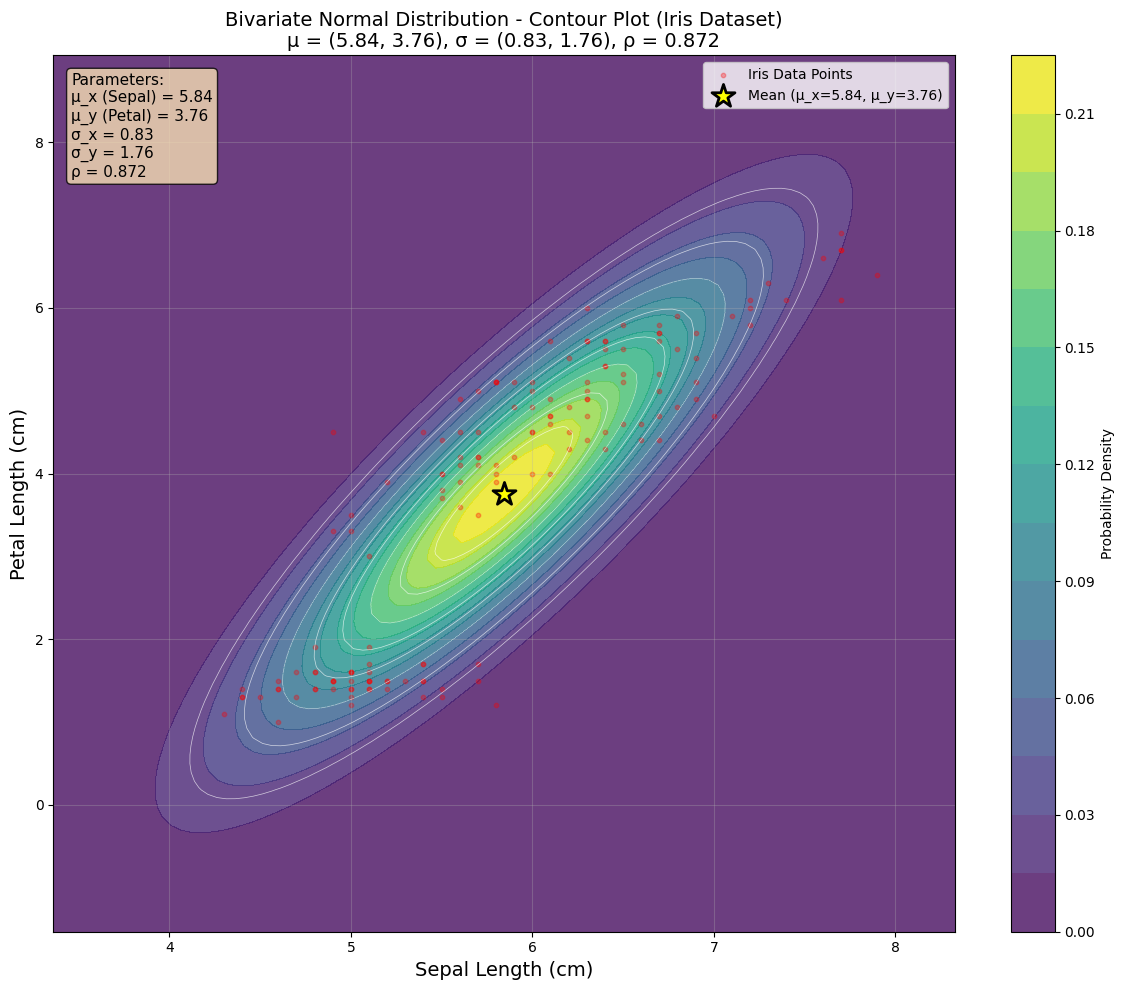


Contour plot saved as 'bvn_contour_plot.png'


In [ ]:
# contour plot
fig, ax = plt.subplots(figsize=(12, 10))

# contour plot
contour_filled = ax.contourf(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis', alpha=0.8)

#  contour lines
contour_lines = ax.contour(X_grid, Y_grid, Z_grid, levels=10, colors='white', linewidths=0.5, alpha=0.7)


cbar = plt.colorbar(contour_filled, ax=ax, label='Probability Density')

# Scatter plot of actual data points
ax.scatter(x_data, y_data, c='red', alpha=0.3, s=10, label='Iris Data Points')


ax.scatter(mu_x, mu_y, c='yellow', marker='*', s=300, edgecolors='black', 
           linewidth=2, label=f'Mean (μ_x={mu_x:.2f}, μ_y={mu_y:.2f})', zorder=5)

# Labels and title
ax.set_xlabel('Sepal Length (cm)', fontsize=14)
ax.set_ylabel('Petal Length (cm)', fontsize=14)
ax.set_title(f'Bivariate Normal Distribution - Contour Plot (Iris Dataset)\n'
             f'μ = ({mu_x:.2f}, {mu_y:.2f}), σ = ({sigma_x:.2f}, {sigma_y:.2f}), ρ = {rho:.3f}', 
             fontsize=14)

#  parameter box
textstr = f'Parameters:\n'
textstr += f'μ_x (Sepal) = {mu_x:.2f}\n'
textstr += f'μ_y (Petal) = {mu_y:.2f}\n'
textstr += f'σ_x = {sigma_x:.2f}\n'
textstr += f'σ_y = {sigma_y:.2f}\n'
textstr += f'ρ = {rho:.3f}'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('bvn_contour_plot.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nContour plot saved as 'bvn_contour_plot.png'")

## 8. 3D Surface Plot Visualization

The 3D plot provides an intuitive view of the PDF as a "bell-shaped" surface.

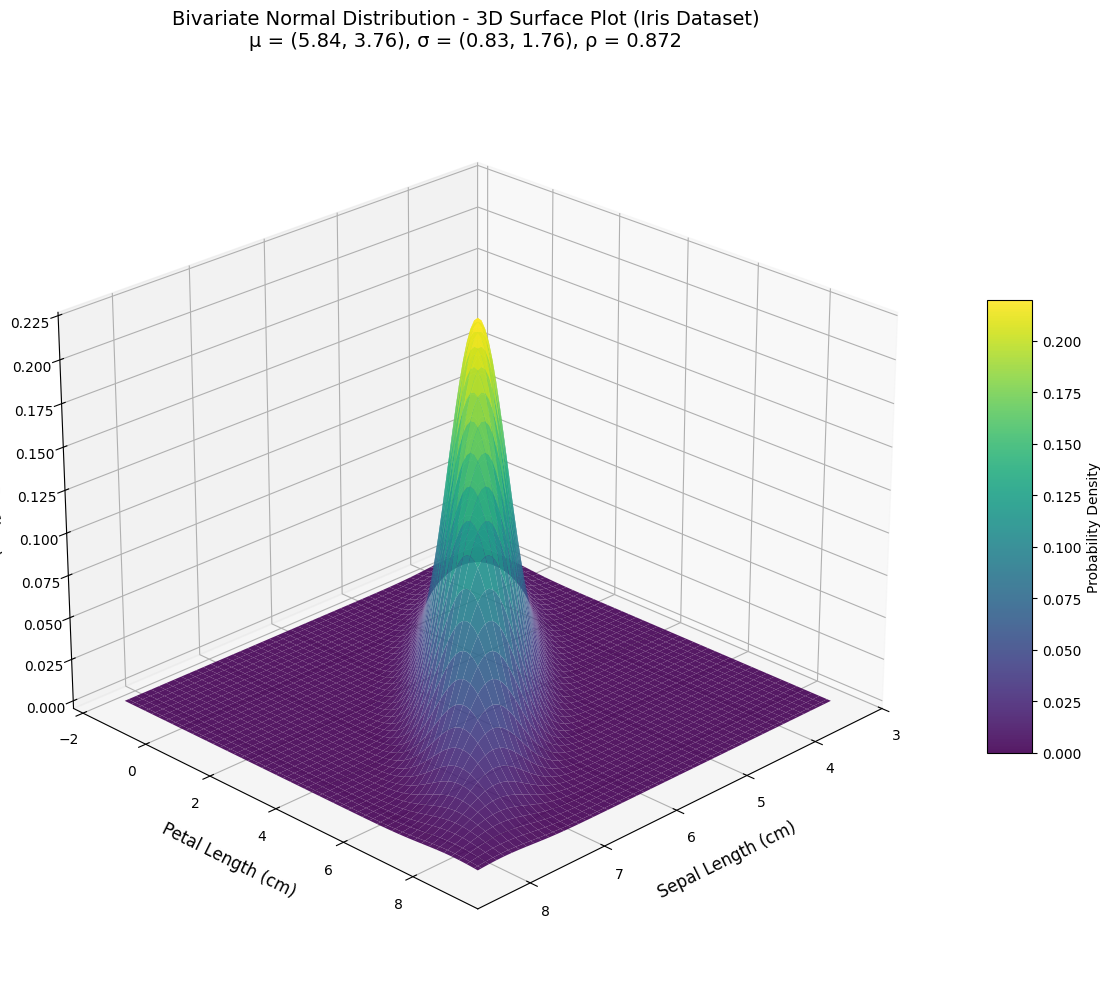


3D surface plot saved as 'bvn_3d_plot.png'


In [ ]:
# Create 3D surface plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', 
                       edgecolor='none', alpha=0.9, antialiased=True)

# colorbar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Probability Density')

# Labels and title
ax.set_xlabel('Sepal Length (cm)', fontsize=12, labelpad=10)
ax.set_ylabel('Petal Length (cm)', fontsize=12, labelpad=10)
ax.set_zlabel('PDF f(x,y)', fontsize=12, labelpad=10)
ax.set_title(f'Bivariate Normal Distribution - 3D Surface Plot (Iris Dataset)\n'
             f'μ = ({mu_x:.2f}, {mu_y:.2f}), σ = ({sigma_x:.2f}, {sigma_y:.2f}), ρ = {rho:.3f}', 
             fontsize=14, pad=20)

# viewing angle for better visualization
ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.savefig('bvn_3d_plot.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n3D surface plot saved as 'bvn_3d_plot.png'")

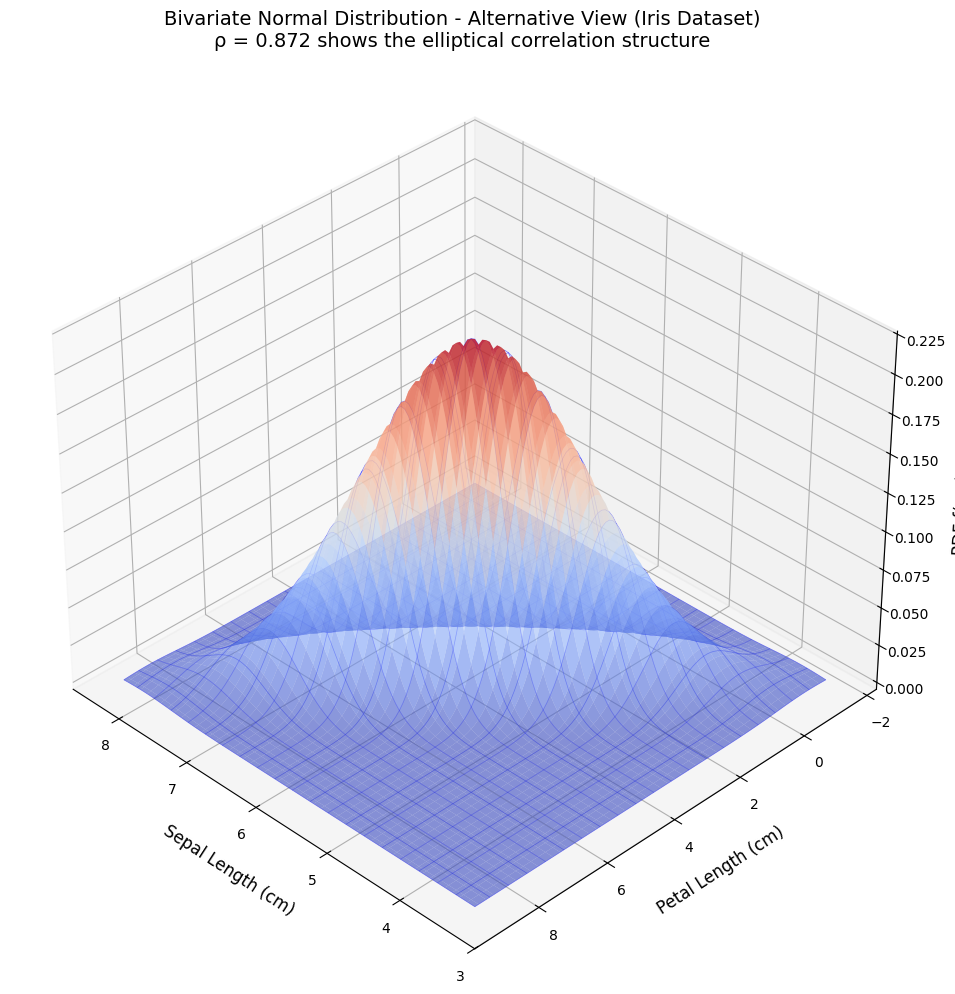

In [ ]:
# Additional 3D view - different angle
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


ax.plot_wireframe(X_grid, Y_grid, Z_grid, color='blue', alpha=0.5, 
                  rstride=5, cstride=5, linewidth=0.5)


surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='coolwarm', 
                       edgecolor='none', alpha=0.6, antialiased=True)

ax.set_xlabel('Sepal Length (cm)', fontsize=12, labelpad=10)
ax.set_ylabel('Petal Length (cm)', fontsize=12, labelpad=10)
ax.set_zlabel('PDF f(x,y)', fontsize=12, labelpad=10)
ax.set_title(f'Bivariate Normal Distribution - Alternative View (Iris Dataset)\n'
             f'ρ = {rho:.3f} shows the elliptical correlation structure', 
             fontsize=14, pad=20)


ax.view_init(elev=35, azim=135)

plt.tight_layout()
plt.savefig('bvn_3d_plot_alt.png', dpi=150, bbox_inches='tight')
plt.show()

## 9. Analysis: Effect of Parameters on Distribution Shape

### Key Observations:

1. **Mean (μ)**: The mean vector $[\mu_x, \mu_y]$ determines the **center/peak** of the distribution.
   - The peak of the PDF occurs at this location

2. **Standard Deviation (σ)**: Controls the **spread** in each direction.
   - $\sigma_x$: Spread along the X-axis
   - $\sigma_y$: Spread along the Y-axis
   - Larger σ means wider spread (flatter peak)

3. **Correlation (ρ)**: Controls the **orientation and shape** of the elliptical contours.
   - ρ > 0: Ellipses tilted in positive direction (X and Y move together)
   - ρ < 0: Ellipses tilted in negative direction (X and Y move opposite)
   - ρ = 0: Circular contours (X and Y independent)
   - |ρ| closer to 1: More elongated ellipses (stronger linear relationship)

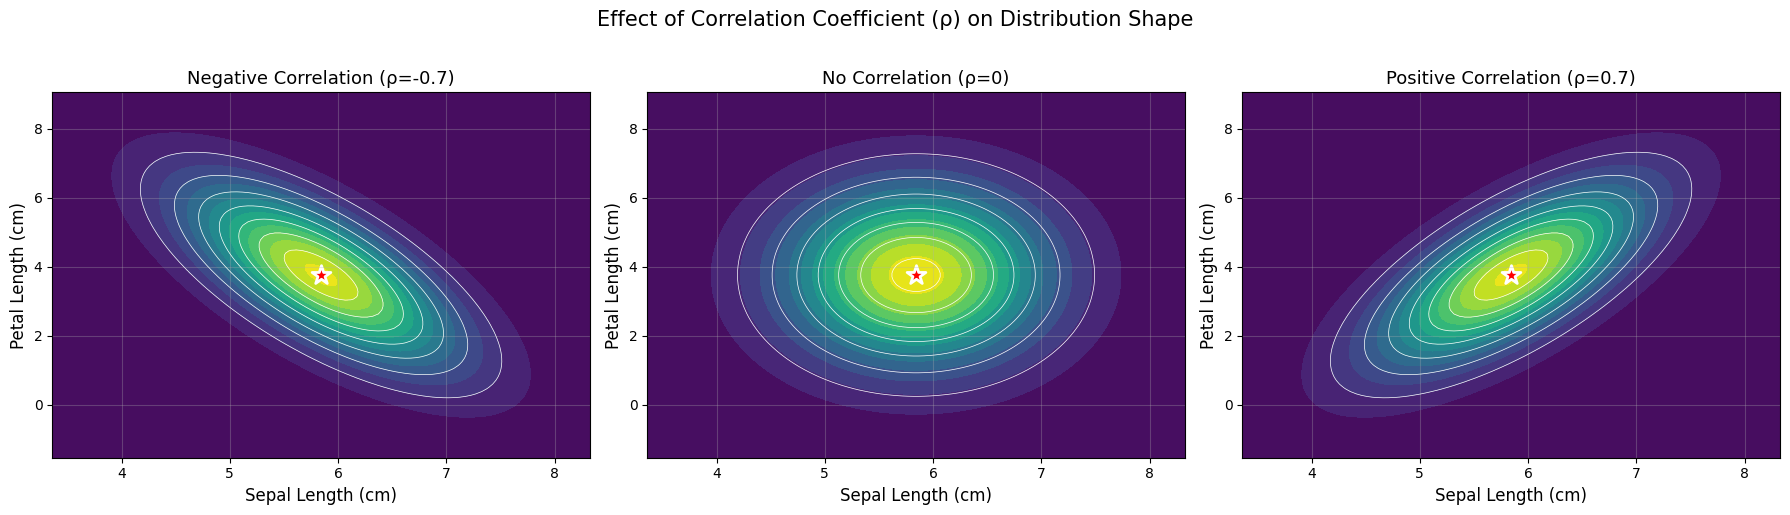


Correlation comparison plot saved as 'bvn_correlation_comparison.png'


In [ ]:
# effect of correlation coefficient
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

rho_values = [-0.7, 0, 0.7]
titles = ['Negative Correlation (ρ=-0.7)', 'No Correlation (ρ=0)', 'Positive Correlation (ρ=0.7)']

for ax, rho_demo, title in zip(axes, rho_values, titles):
    
    Z_demo = bivariate_normal_pdf(X_grid, Y_grid, mu_x, mu_y, sigma_x, sigma_y, rho_demo)
    
    
    contour = ax.contourf(X_grid, Y_grid, Z_demo, levels=15, cmap='viridis')
    ax.contour(X_grid, Y_grid, Z_demo, levels=8, colors='white', linewidths=0.5)
    
    ax.scatter(mu_x, mu_y, c='red', marker='*', s=200, edgecolors='white', linewidth=2)
    ax.set_xlabel('Sepal Length (cm)', fontsize=12)
    ax.set_ylabel('Petal Length (cm)', fontsize=12)
    ax.set_title(title, fontsize=13)
    ax.grid(True, alpha=0.3)

plt.suptitle('Effect of Correlation Coefficient (ρ) on Distribution Shape', fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig('bvn_correlation_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nCorrelation comparison plot saved as 'bvn_correlation_comparison.png'")

## 10. Summary

### What We Implemented:

 **Dataset**: Loaded Iris dataset from UCI ML Repository (online source)
   - URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

 **Variables Used**: Sepal Length (X) vs Petal Length (Y)

 **Parameter Estimation**: Computed μ, σ, and ρ from scratch (no statistical libraries)

 **BVN PDF**: Implemented the complete bivariate normal formula without scipy.stats

 **Visualizations**:
   - Contour plot showing elliptical level curves
   - 3D surface plot showing the bell-shaped PDF
   - Comparison of different correlation values

In [14]:
# Final summary
print("=" * 70)
print("PART 1: BIVARIATE NORMAL DISTRIBUTION - COMPLETE")
print("=" * 70)

print("\n Dataset Information:")
print("-" * 50)
print("Source: UCI Machine Learning Repository")
print("URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
print(f"Total data points: {len(x_data)}")
print("-" * 50)

print("\n Estimated Parameters from Iris Dataset:")
print("-" * 50)
print(f"{'Parameter':<20} {'Value':<15} {'Description':<25}")
print("-" * 50)
print(f"{'μ_x (Sepal Length)':<20} {mu_x:<15.4f} {'Mean of X':<25}")
print(f"{'μ_y (Petal Length)':<20} {mu_y:<15.4f} {'Mean of Y':<25}")
print(f"{'σ_x':<20} {sigma_x:<15.4f} {'Std Dev of X':<25}")
print(f"{'σ_y':<20} {sigma_y:<15.4f} {'Std Dev of Y':<25}")
print(f"{'ρ':<20} {rho:<15.4f} {'Correlation coefficient':<25}")
print("-" * 50)

print("\n Files saved:")
print("  - bvn_contour_plot.png")
print("  - bvn_3d_plot.png")
print("  - bvn_3d_plot_alt.png")
print("  - bvn_correlation_comparison.png")
print("\n" + "=" * 70)

PART 1: BIVARIATE NORMAL DISTRIBUTION - COMPLETE

 Dataset Information:
--------------------------------------------------
Source: UCI Machine Learning Repository
URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Total data points: 150
--------------------------------------------------

 Estimated Parameters from Iris Dataset:
--------------------------------------------------
Parameter            Value           Description              
--------------------------------------------------
μ_x (Sepal Length)   5.8433          Mean of X                
μ_y (Petal Length)   3.7587          Mean of Y                
σ_x                  0.8281          Std Dev of X             
σ_y                  1.7644          Std Dev of Y             
ρ                    0.8718          Correlation coefficient  
--------------------------------------------------

 Files saved:
  - bvn_contour_plot.png
  - bvn_3d_plot.png
  - bvn_3d_plot_alt.png
  - bvn_correlation_comparis